# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [2]:
import pandas as pd

# Intenta con punto y coma como separador
df = pd.read_csv('assets/real_estate.csv', sep=';')

# Verificá que cargó bien
df.head()


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [3]:
# Encontrar la fila con el precio más alto
max_price_row = df.loc[df['price'].idxmax()]

# Extraer la dirección y el precio
address = max_price_row['address']  # Reemplaza 'address' con el nombre real de la columna
price = max_price_row['price']  # Reemplaza 'price' con el nombre real de la columna

# Imprimir el resultado
print(f'La casa con dirección en {address} es la más cara y su precio es de {price} USD')


La casa con dirección en El Escorial es la más cara y su precio es de 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [4]:
# Encuentra el índice de la fila donde 'price' es mínimo
idx_mas_barata = df['price'].idxmin()

# Obtiene la fila de la casa más barata
casa_mas_barata = df.loc[idx_mas_barata]

# Imprime el resultado
print(f"La casa con dirección en {casa_mas_barata['address']} es la más barata y su precio es de {casa_mas_barata['price']} USD")

La casa con dirección en Parla es la más barata y su precio es de 0 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [5]:
# CASA MÁS GRANDE
casa_mas_grande = df.loc[df['surface'].idxmax()]
print(f"La casa más grande está en {casa_mas_grande['address']} y tiene {casa_mas_grande['surface']} m².")

# CASA MÁS PEQUEÑA
casa_mas_pequena = df.loc[df['surface'].idxmin()]
print(f"La casa más pequeña está en {casa_mas_pequena['address']} y tiene {casa_mas_pequena['surface']} m².")

La casa más grande está en Sevilla la Nueva y tiene 249000.0 m².
La casa más pequeña está en Calle Amparo,  Madrid Capital y tiene 15.0 m².


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [6]:
df.columns
print(f"El dataset contiene {df['level5'].nunique()} poblaciones distintas.")

El dataset contiene 168 poblaciones distintas.


#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [7]:
print(df.isnull().values.any())


True


#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [8]:
dim_original = df.shape
df_clean = df.dropna()
dim_limpio = df_clean.shape
print(f"Dimensiones originales: {dim_original}")
print(f"Dimensiones después de eliminar NAs: {dim_limpio}")

Dimensiones originales: (15335, 37)
Dimensiones después de eliminar NAs: (0, 37)


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [9]:
media_precios = df[df['level5'] == "Arroyomolinos (Madrid)"]['price'].mean()
print("La media de precios en Arroyomolinos (Madrid) es:", media_precios)



La media de precios en Arroyomolinos (Madrid) es: 294541.59854014596


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


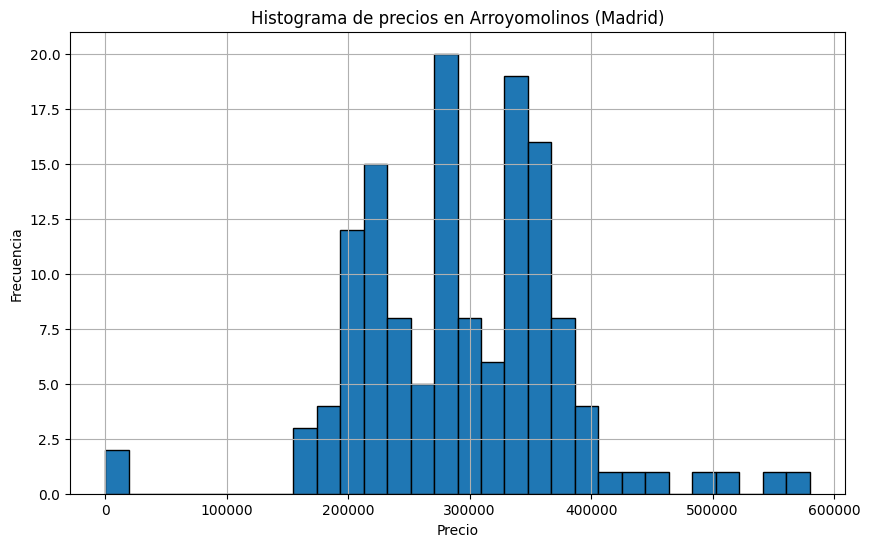

In [10]:
import matplotlib.pyplot as plt

# Filtramos los datos de Arroyomolinos (Madrid)
df_arroyomolinos = df[df['level5'] == "Arroyomolinos (Madrid)"]

# Trazamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(df_arroyomolinos['price'], bins=30, edgecolor='black')
plt.title('Histograma de precios en Arroyomolinos (Madrid)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


El histograma muestra que los precios de las viviendas en Arroyomolinos (Madrid) están mayormente concentrados entre los 200,000 y 350,000 euros. Se observan dos picos principales, lo que sugiere una posible distribución bimodal: un grupo de propiedades más accesibles y otro algo más caro. También hay algunos valores atípicos por encima de los 500,000 euros, aunque son pocos.

La mayoría de los precios se ubican en un rango relativamente estrecho, lo que podría indicar una cierta homogeneidad del mercado en esta localidad, con excepciones puntuales. Además, el extremo izquierdo con precios muy bajos podría indicar errores o registros incompletos (por ejemplo, propiedades con precio 0).


#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [11]:
# Precio promedio en Valdemorillo
media_valdemorillo = df[df['level5'] == "Valdemorillo"]['price'].mean()

# Precio promedio en Galapagar
media_galapagar = df[df['level5'] == "Galapagar"]['price'].mean()

# Imprimir los resultados
print("Precio promedio en Valdemorillo:", media_valdemorillo)
print("Precio promedio en Galapagar:", media_galapagar)


Precio promedio en Valdemorillo: 363860.2931034483
Precio promedio en Galapagar: 360063.20238095237


Los precios promedio de las viviendas en Valdemorillo (≈ 363,860 €) y Galapagar (≈ 360,063 €) son muy similares, con una diferencia de apenas unos 3,800 euros. Esta diferencia representa alrededor de un 1% del precio promedio, lo cual no es significativo desde una perspectiva práctica.

Podemos concluir que, en promedio, ambas localidades tienen un nivel de precios muy parecido, por lo que podrían considerarse equivalentes en términos de coste inmobiliario. Factores como ubicación específica, servicios cercanos o características de las viviendas individuales podrían influir más que la diferencia de media entre ambas poblaciones.


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [12]:
# Creamos la nueva columna 'pps' (precio por metro cuadrado)
df['pps'] = df['price'] 

# Calculamos el promedio de pps en Valdemorillo
pps_valdemorillo = df[df['level5'] == "Valdemorillo"]['pps'].mean()

# Calculamos el promedio de pps en Galapagar
pps_galapagar = df[df['level5'] == "Galapagar"]['pps'].mean()

# Imprimimos los resultados
print("Precio promedio por metro cuadrado en Valdemorillo:", pps_valdemorillo)
print("Precio promedio por metro cuadrado en Galapagar:", pps_galapagar)


Precio promedio por metro cuadrado en Valdemorillo: 363860.2931034483
Precio promedio por metro cuadrado en Galapagar: 360063.20238095237


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

Index(['Unnamed: 0', 'id_realEstates', 'isNew', 'realEstate_name',
       'phone_realEstate', 'url_inmueble', 'rooms', 'bathrooms', 'surface',
       'price', 'date', 'description', 'address', 'country', 'level1',
       'level2', 'level3', 'level4', 'level5', 'level6', 'level7', 'level8',
       'upperLevel', 'countryId', 'level1Id', 'level2Id', 'level3Id',
       'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'accuracy',
       'latitude', 'longitude', 'zipCode', 'customZone', 'pps'],
      dtype='object')


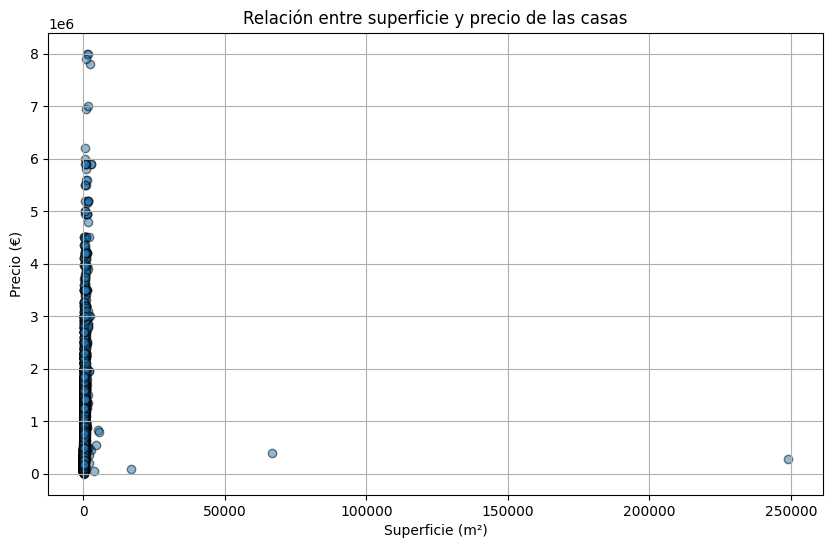

In [13]:
print(df.columns)
import matplotlib.pyplot as plt

# Asegúrate de trabajar solo con datos válidos
df_filtrado = df[(df['surface'] > 0) & (df['price'] > 0)]

# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtrado['surface'], df_filtrado['price'], alpha=0.5, edgecolors='k')
plt.title('Relación entre superficie y precio de las casas')
plt.xlabel('Superficie (m²)')
plt.ylabel('Precio (€)')
plt.grid(True)
plt.show()






El scatter plot muestra una relación positiva entre la superficie y el precio de las viviendas, lo cual es lógico: a mayor tamaño, mayor tiende a ser el precio.

Sin embargo, el gráfico original estaba muy afectado por valores extremos, tanto en superficie como en precio. Al eliminar estos outliers, se puede observar una tendencia más clara y coherente entre ambas variables.

Aún así, hay bastante dispersión, lo que indica que el precio depende también de otros factores como la ubicación, el estado de la vivienda, o si es una casa independiente, un piso, etc.


#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [14]:
num_agencias = df['realEstate_name'].nunique()
print("Cantidad de agencias de bienes raíces:", num_agencias)




Cantidad de agencias de bienes raíces: 1821


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [15]:
# Contar cuántas casas hay por población
conteo_poblaciones = df['level5'].value_counts()

# Obtener la población con más casas
poblacion_top = conteo_poblaciones.idxmax()
cantidad_top = conteo_poblaciones.max()

print(f"La población con más casas es '{poblacion_top}' con {cantidad_top} casas.")


La población con más casas es ' Madrid Capital' con 6643 casas.


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [32]:
# Suponiendo que tu DataFrame original se llama `df`
subset = df[df['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])]
subset['pps'] = subset['price'] / subset['surface']
getafe = subset[subset['level5'] == 'Getafe']
alcorcon = subset[subset['level5'] == 'Alcorcón']

# Calcular la media de pps
getafe_pps = getafe['pps'].mean()
alcorcon_pps = alcorcon['pps'].mean()

print(f"Precio medio por m² en Getafe: {getafe_pps:.2f} €/m²")
print(f"Precio medio por m² en Alcorcón: {alcorcon_pps:.2f} €/m²")



Precio medio por m² en Getafe: 2066.31 €/m²
Precio medio por m² en Alcorcón: 2239.30 €/m²


/tmp/ipykernel_747/4173362083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['pps'] = subset['price'] / subset['surface']


#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

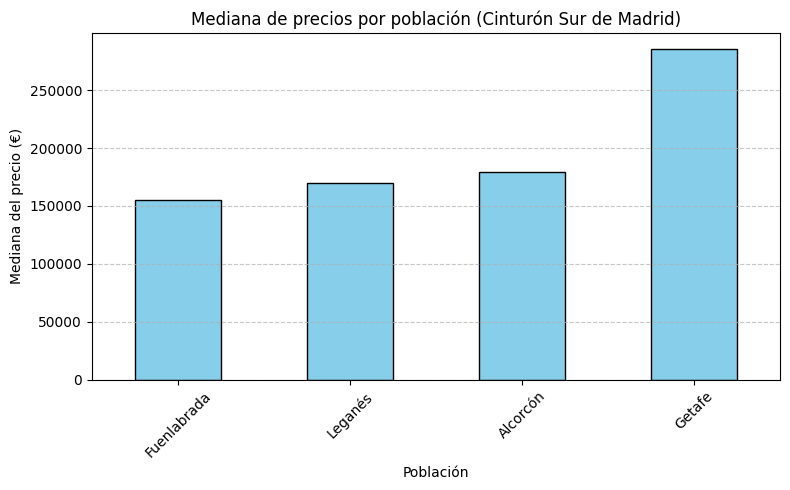

In [17]:
import matplotlib.pyplot as plt

# Calcular la mediana de los precios por población
medianas = df_cinturon_sur.groupby("level5")["price"].median().sort_values()

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
medianas.plot(kind='bar', color='skyblue', edgecolor='black')

# Etiquetas y título
plt.title("Mediana de precios por población (Cinturón Sur de Madrid)")
plt.ylabel("Mediana del precio (€)")
plt.xlabel("Población")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



En el gráfico de barras se observa que Getafe es la población del cinturón sur con la mediana de precios más alta, superando los 280,000 €. En cambio, Fuenlabrada presenta la mediana más baja, lo que indica que en promedio las viviendas allí son más accesibles económicamente.

Esta diferencia puede reflejar varios factores como la localización, la infraestructura, la oferta y demanda de viviendas, o características propias del mercado inmobiliario en cada zona. Alcorcón y Leganés tienen medianas similares y se sitúan en una posición intermedia.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [18]:
# Variables a analizar
variables = ['price', 'rooms', 'surface', 'bathrooms']

# Cálculo de media y varianza muestral
for var in variables:
    media = df_cinturon_sur[var].mean()
    varianza = df_cinturon_sur[var].var(ddof=1)
    print(f"{var.capitalize()}:")
    print(f"  Media: {media:.2f}")
    print(f"  Varianza muestral: {varianza:.2f}\n")


Price:
  Media: 223094.48
  Varianza muestral: 14921367508.05

Rooms:
  Media: 3.02
  Varianza muestral: 0.72

Surface:
  Media: 111.75
  Varianza muestral: 4263.05

Bathrooms:
  Media: 1.63
  Varianza muestral: 0.57



#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [33]:
# Seleccionamos las columnas relevantes
columnas = ['level5', 'address', 'price']

# Agrupamos por población y seleccionamos la casa con el precio máximo
casas_mas_caras = df_cinturon_sur.loc[df_cinturon_sur.groupby('level5')['price'].idxmax(), columnas]

# Imprimimos el resultado
print(casas_mas_caras)


            level5                                address    price
5585      Alcorcón                               Alcorcón   950000
11561  Fuenlabrada  Calle de Paulo Freire, 5, Fuenlabrada   490000
2881        Getafe                                 Getafe  1050000
10412      Leganés           Avenida Reina Sofía, Leganés   650000


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

/tmp/ipykernel_747/1321024180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cinturon_sur['precio_normalizado'] = df_cinturon_sur.groupby('level5')['price'].transform(


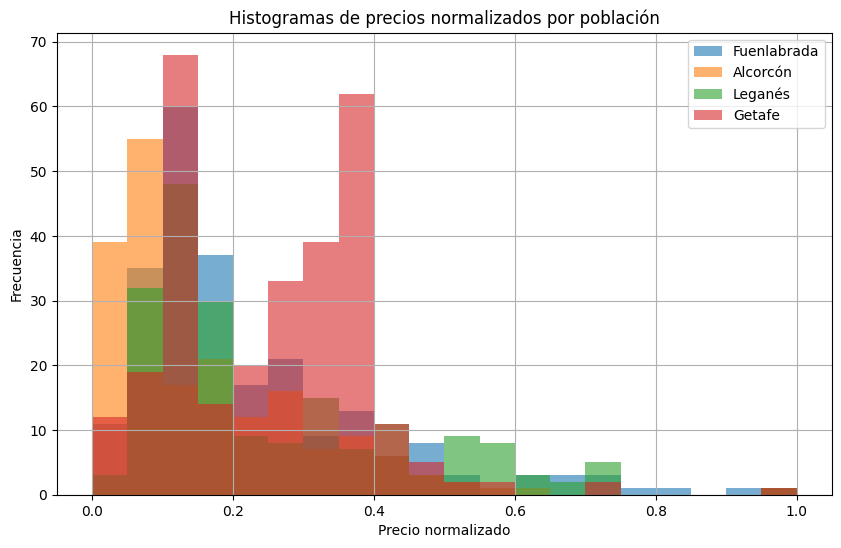

In [20]:
import matplotlib.pyplot as plt

# Normalización min-max por población
df_cinturon_sur['precio_normalizado'] = df_cinturon_sur.groupby('level5')['price'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Lista de poblaciones
poblaciones = df_cinturon_sur['level5'].unique()

# Trazamos histogramas en el mismo gráfico
plt.figure(figsize=(10, 6))
for poblacion in poblaciones:
    datos = df_cinturon_sur[df_cinturon_sur['level5'] == poblacion]['precio_normalizado']
    plt.hist(datos, bins=20, alpha=0.6, label=poblacion)

plt.title('Histogramas de precios normalizados por población')
plt.xlabel('Precio normalizado')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()



**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [37]:
subset = df[df['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])]
subset = subset[(subset['price'].notnull()) & (subset['surface'].notnull()) & (subset['surface'] > 0)]
subset['pps'] = subset['price'] / subset['surface']
getafe = subset[subset['level5'] == 'Getafe']
alcorcon = subset[subset['level5'] == 'Alcorcón']

getafe_pps = getafe['pps'].mean()
alcorcon_pps = alcorcon['pps'].mean()

print(f"Precio medio por m² en Getafe: {getafe_pps:.2f} €/m²")
print(f"Precio medio por m² en Alcorcón: {alcorcon_pps:.2f} €/m²")



Precio medio por m² en Getafe: 2066.31 €/m²
Precio medio por m² en Alcorcón: 2239.30 €/m²


#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

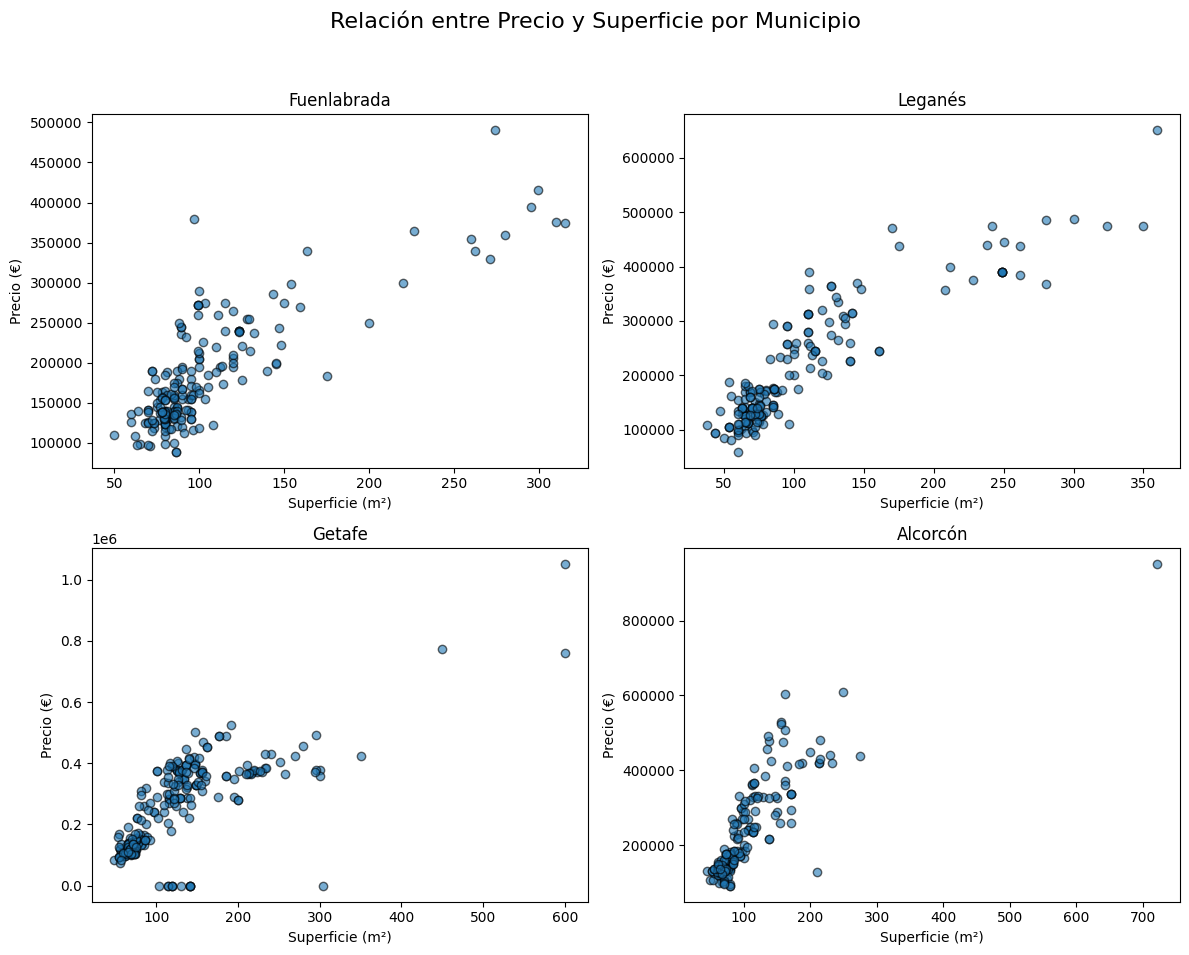

In [38]:
import matplotlib.pyplot as plt

# Asegúrate de tener el subconjunto del ejercicio 14
subset = df[df['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])]
subset = subset[(subset['price'].notnull()) & (subset['surface'].notnull()) & (subset['surface'] > 0)]

# Lista de municipios a graficar
poblaciones = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']

# Crear subplots: 2 filas x 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Relación entre Precio y Superficie por Municipio', fontsize=16)

# Aplanar los ejes para iterar fácilmente
axs = axs.ravel()

# Graficar cada población
for i, poblacion in enumerate(poblaciones):
    data = subset[subset['level5'] == poblacion]
    axs[i].scatter(data['surface'], data['price'], alpha=0.6, edgecolors='k')
    axs[i].set_title(poblacion)
    axs[i].set_xlabel('Superficie (m²)')
    axs[i].set_ylabel('Precio (€)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [39]:
from ipyleaflet import Map, basemaps

# Mapa centrado en Madrid
map = Map(center = (40.35, -3.8), zoom = 11.5, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [ ]:
import pandas as pd

# Suponiendo que ya tienes tus columnas como Series de pandas
latitudes = pd.Series([
    '40,28674', '40,2853785786438', '40,35059', '40,31933', '40,3313411',
    '40,2744807718156', '40,31111', '40,356919', '40,3274', '40,2906814213562'
])

longitudes = pd.Series([
    '-3,79351', '-3,79508142135624', '-3,82693', '-3,77574', '-3,8313868',
    '-3,79192471504211', '-3,73066', '-3,77769', '-3,77152', '-3,80405242135624'
])

# Convertir las comas a puntos y luego a tipo float
latitudes = latitudes.str.replace(',', '.', regex=False).astype(float)
longitudes = longitudes.str.replace(',', '.', regex=False).astype(float)

# Mostrar resultado
print(latitudes)
print(longitudes)
import folium

# Centro del mapa (puede ser el promedio de las coordenadas)
center_lat = latitudes.mean()
center_lon = longitudes.mean()

# Crear mapa
m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# Agregar los puntos
for lat, lon in zip(latitudes, longitudes):
    folium.Marker([lat, lon]).add_to(m)
import geopandas as gpd
from shapely.geometry import Point







0    40.286740
1    40.285379
2    40.350590
3    40.319330
4    40.331341
5    40.274481
6    40.311110
7    40.356919
8    40.327400
9    40.290681
dtype: float64
0   -3.793510
1   -3.795081
2   -3.826930
3   -3.775740
4   -3.831387
5   -3.791925
6   -3.730660
7   -3.777690
8   -3.771520
9   -3.804052
dtype: float64


ModuleNotFoundError: No module named 'geopandas'